# Milestone 2

In [1]:
import sys
sys.path.append('../../../src')

import glob, os
import numpy as np 
import scipy as sp
import pandas as pd
from sklearn import decomposition, datasets, svm
from matplotlib import pyplot as plt
from p1.models.utils import get_divided_data, get_data_comp, get_common_label, creat_pred_file, calc_acc

%load_ext autoreload
%autoreload 2

Data Loading

In [3]:
# Get Files
data_dir = "../project_data/data"
data_dir_dict = dict()
for folder in os.listdir(data_dir):
    # print(folder)
    data_dir_dict[folder] = list()
    for file_name in glob.glob(f"{data_dir}/{folder}/*.csv"):
        # prprint(bag_of_words_k_folds)int(file_name)
        data_dir_dict[folder].append(os.path.abspath("./") + "/" + file_name)
        # print(os.path.abspath("./") + "/" + file_name)

# train, eval, test
# Load "bag-of-words" data
bag_of_words, glove, tfidf = list(), list(), list()
for i in range(3):
    bag_of_words.append(pd.read_csv(data_dir_dict["bag-of-words"][i]))
    glove.append(pd.read_csv(data_dir_dict["glove"][i]))
    tfidf.append(pd.read_csv(data_dir_dict["tfidf"][i]))

Glove Data Visualization

In [2]:
glove_train, glove_labels = get_data_comp(glove[0], labels=[1,0])
x = glove_train.to_numpy(); x = x/x.max()

n_samps, n_features = x.shape

NameError: name 'glove' is not defined

In [126]:
pca = decomposition.PCA(min(n_samps, n_features))
pca = pca.fit(x)

s_vals = pca.components_[:, :]

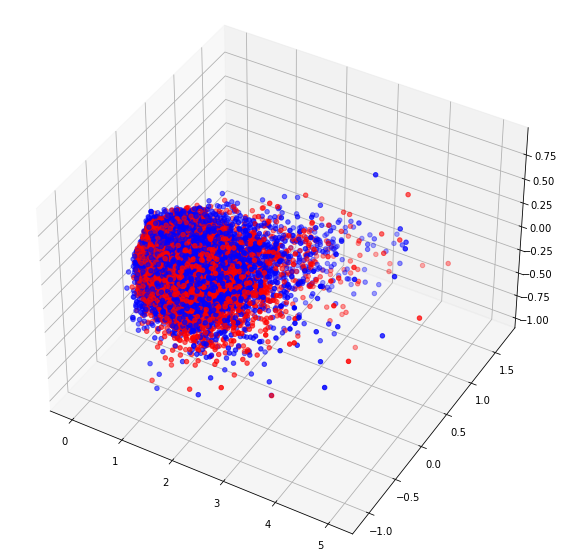

In [113]:
fig = plt.figure(figsize=[10, 10])
ax = plt.axes(projection='3d')
colors = ['b' if glove_labels[i] else 'r' for i in range(n_samps)]

p1 = np.dot(x, s_vals[0, :].T)
p2 = np.dot(x, s_vals[1, :].T)
p3 = np.dot(x, s_vals[2, :].T)

ax.scatter3D(p1, p2, p3, c=colors)
ax.view_init(40, -60)

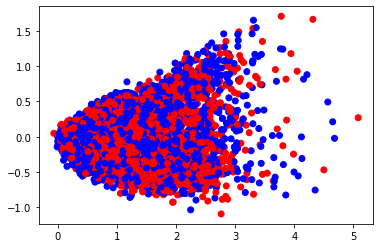

In [114]:
plt.figure(figsize=[6,4])
plt.scatter(p1, p2, c=colors)
plt.show()

In [127]:
# import time

# for i in range(0, n_samps-1):
#     fig = plt.figure(figsize=[5,5])
#     ax = plt.axes()
    
#     ax.scatter(x[:,i], x[:,i+1], c=colors)
#     plt.show()
#     time.sleep(1)
    
#     plt.close(fig)
m = svm.SVC()
m.fit(x, glove_labels)

SVC()

: 

In [124]:
glove_test, glove_test_labels = get_data_comp(glove[1], labels=[1,0])
test_pred = m.predict(glove_test.to_numpy())
calc_acc(test_pred, glove_test_labels)
creat_pred_file(test_pred, "m2_2_JL.csv")

Discussion: I tried to visualize the dataset given its dot product with the principle components of the dataset. Need to do further visualization before I continue designing my final model.